In [2]:
import pypsa 
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Set parameter Username
Set parameter LicenseID to value 2756812
Academic license - for non-commercial use only - expires 2026-12-19


Cannot find header.dxf (GDAL_DATA is not defined)


c:\Users\anouk\miniforge3\envs\pypsa-eur-neu\Lib\site-packages\xarray\backends\plugins.py:110: RuntimeWarning:

Engine 'cfgrib' loading failed:
Cannot find the ecCodes library

INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, carriers, generators, lines, links, loads, storage_units, stores, sub_networks


{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x16a39433770>},
 'branches': {'Link': <matplotlib.collections.LineCollection at 0x16a394338c0>,
  'Line': <matplotlib.collections.LineCollection at 0x16a39459090>},
 'flows': {}}

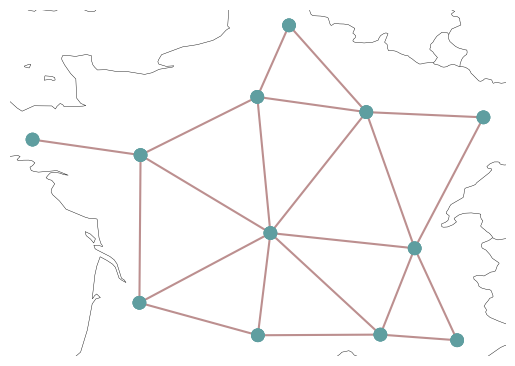

In [3]:
# load network
#n = pypsa.Network("../data/networks/base.nc") # base has only lines, transformers and branches
# n = pypsa.Network("../data/networks/elec_s_256_ec.nc")
# n = pypsa.Network("../data/networks/elec.nc")
# n = pypsa.Network("../pypsa-eur/results/test-elec/networks/base_s_6_elec_.nc")
# n = pypsa.Network("../pypsa-eur/resources/test-elec/networks/base.nc")

n = pypsa.Network("../pypsa-eur/results/hydro-phs-minimalconfig-fr/networks/base_s_12_elec_.nc")

# plot network
n.plot() #instead of n.plot()

In [5]:
# generators by carrier (ror = run-of-river)
print(n.generators.groupby("carrier")["p_nom"].sum().round(2).sort_values(ascending=False))

carrier
nuclear       52240.00
onwind        23778.60
solar         12500.10
CCGT           9144.20
ror            6870.65
offwind-ac     3024.20
coal           1161.64
lignite         977.00
oil             624.00
biomass         252.00
solar-hsat        0.00
Name: p_nom, dtype: float64


In [6]:
# storage units by carrier (hydro = reservoir hydro, phs = pumped hydro storage)
print(n.storage_units.groupby("carrier")["p_nom"].sum().round(2).sort_values(ascending=False))

carrier
hydro    8573.49
PHS      5236.30
Name: p_nom, dtype: float64


In [ ]:
# data frame of all storage units
n.storage_units

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_nom_set,p_min_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
FR0 10 PHS,FR0 10,PQ,,808.000000,0.0,False,0.0,inf,NaN,-1.0,...,False,NaN,True,False,5.573020,0.866025,0.866025,0.0,0.0,808.000000
FR0 3 PHS,FR0 3,PQ,,921.000000,0.0,False,0.0,inf,NaN,-1.0,...,False,NaN,True,False,39.522258,0.866025,0.866025,0.0,0.0,921.000000
FR0 4 PHS,FR0 4,PQ,,3507.300000,0.0,False,0.0,inf,NaN,-1.0,...,False,NaN,True,False,11.856172,0.866025,0.866025,0.0,0.0,3507.300000
FR0 1 hydro,FR0 1,PQ,,1577.701911,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,1921.253432,0.000000,0.900000,0.0,0.0,1577.701911
FR0 3 hydro,FR0 3,PQ,,1946.677707,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,0.361122,0.000000,0.900000,0.0,0.0,1946.677707
FR0 4 hydro,FR0 4,PQ,,2665.184713,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,671.580499,0.000000,0.900000,0.0,0.0,2665.184713
FR0 5 hydro,FR0 5,PQ,,583.878981,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,1921.253432,0.000000,0.900000,0.0,0.0,583.878981
FR0 6 hydro,FR0 6,PQ,,139.000000,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,1921.253432,0.000000,0.900000,0.0,0.0,139.000000
FR0 7 hydro,FR0 7,PQ,,1056.649682,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,1921.253432,0.000000,0.900000,0.0,0.0,1056.649682


In [ ]:
# hydro generators
hydro_generators = n.generators[n.generators.carrier == "ror"]

print(hydro_generators)

             bus control type        p_nom  p_nom_mod  p_nom_extendable  \
name                                                                      
FR0 1 ror  FR0 1      PQ        119.665036        0.0             False   
FR0 3 ror  FR0 3      PQ        319.000000        0.0             False   
FR0 4 ror  FR0 4      PQ       2208.714113        0.0             False   
FR0 5 ror  FR0 5      PQ        223.670000        0.0             False   
FR0 6 ror  FR0 6      PQ       1476.100000        0.0             False   
FR0 7 ror  FR0 7      PQ        713.500000        0.0             False   
FR0 8 ror  FR0 8      PQ       1810.000000        0.0             False   

           p_nom_min  p_nom_max  p_nom_set  p_min_pu  ...  min_up_time  \
name                                                  ...                
FR0 1 ror        0.0        inf        NaN       0.0  ...            0   
FR0 3 ror        0.0        inf        NaN       0.0  ...            0   
FR0 4 ror        0.0        

In [ ]:
# hydro busses
hydro_buses = n.buses.loc[hydro_generators.bus]
print(hydro_buses[["v_nom", "country"]])


Wasserkraftwerke pro Bus:
       v_nom country
name                
FR0 1  380.0      FR
FR0 3  380.0      FR
FR0 4  380.0      FR
FR0 5  380.0      FR
FR0 6  380.0      FR
FR0 7  380.0      FR
FR0 8  380.0      FR


In [14]:
# hydro generation time series
hydro_generation = n.generators_t.p[hydro_generators.index]
print(hydro_generation.iloc[:, :])

name        FR0 1 ror   FR0 3 ror    FR0 4 ror   FR0 5 ror   FR0 6 ror  \
snapshot                                                                 
2013-01-01  54.467906  145.199199  1005.340346  101.807844  671.876390   
2013-01-02  54.480602  145.233045  1005.574698  101.831576  672.033009   
2013-01-03  49.483238  131.911188   913.335842   92.490827  610.389102   
2013-01-04  47.305793  126.106601   873.145620   88.420885  583.529680   
2013-01-05  46.200457  123.160046   852.744117   86.354876  569.895201   
2013-01-06  45.346637  120.883955   836.984761   84.758972  559.363107   
2013-01-07  44.658318  119.049022   824.279840   83.472395  550.872319   
2013-01-08  43.146918  115.019967   796.383192   80.647383  532.228783   
2013-01-09  41.319739  110.149120   762.658079   77.232141  509.690040   
2013-01-10  41.273725  110.026458   761.808798   77.146135  509.122459   
2013-01-11  43.172589  115.088407   796.857095   80.695369  532.545494   
2013-01-12  43.129851  114.974470   79

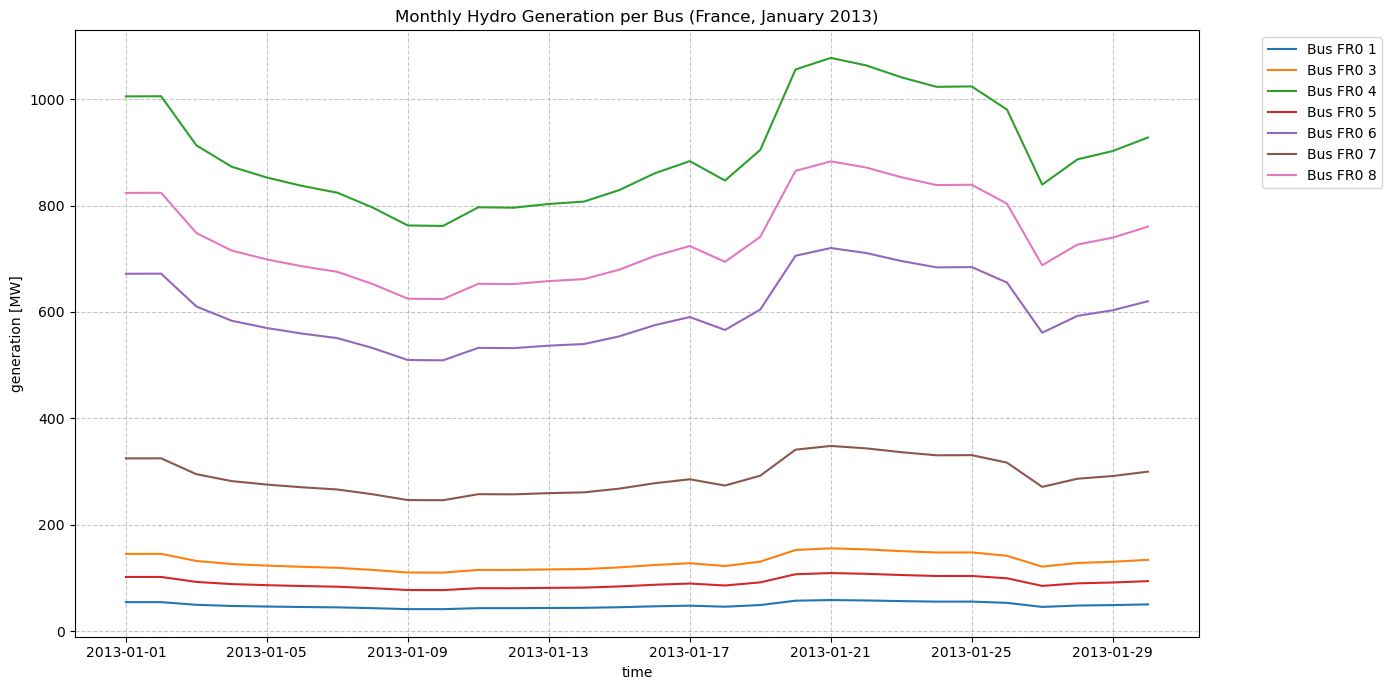

In [ ]:
# Erzeugung pro Bus summieren
hydro_generation_per_bus = pd.DataFrame()
for bus in hydro_generators.bus.unique():
    # Generatoren am aktuellen Bus filtern
    generators_at_bus = hydro_generators[hydro_generators.bus == bus].index
    # Erzeugung dieser Generatoren summieren
    hydro_generation_per_bus[bus] = hydro_generation[generators_at_bus].sum(axis=1)

# Linien-Diagramm für jeden Bus
plt.figure(figsize=(14, 7))
for bus in hydro_generation_per_bus.columns:
    plt.plot(
        hydro_generation_per_bus.index,
        hydro_generation_per_bus[bus],
        label=f"Bus {bus}",
        linewidth=1.5
    )

plt.title("Monthly Hydro Generation per Bus (France, January 2013)")
plt.xlabel("time [date]")
plt.ylabel("generation [MW]")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [24]:
# Identify all storage units  
storage_units = n.storage_units

# Separate PHS and hydro storage units
phs_storage = storage_units[storage_units.carrier == "PHS"]
hydro_storage = storage_units[storage_units.carrier == "hydro"]

print(f"Number of PHS storage units: {len(phs_storage)}")
print(f"Number of hydro storage units: {len(hydro_storage)}")

# Extract generation capacity (p_nom) for PHS and Hydro storage units
phs_capacity = phs_storage.p_nom
hydro_capacity = hydro_storage.p_nom

# Group generation capacity by bus for PHS and Hydro storage units
phs_capacity_per_bus = phs_capacity.groupby(phs_storage.bus).sum()
hydro_capacity_per_bus = hydro_capacity.groupby(hydro_storage.bus).sum()

Number of PHS storage units: 3
Number of hydro storage units: 7


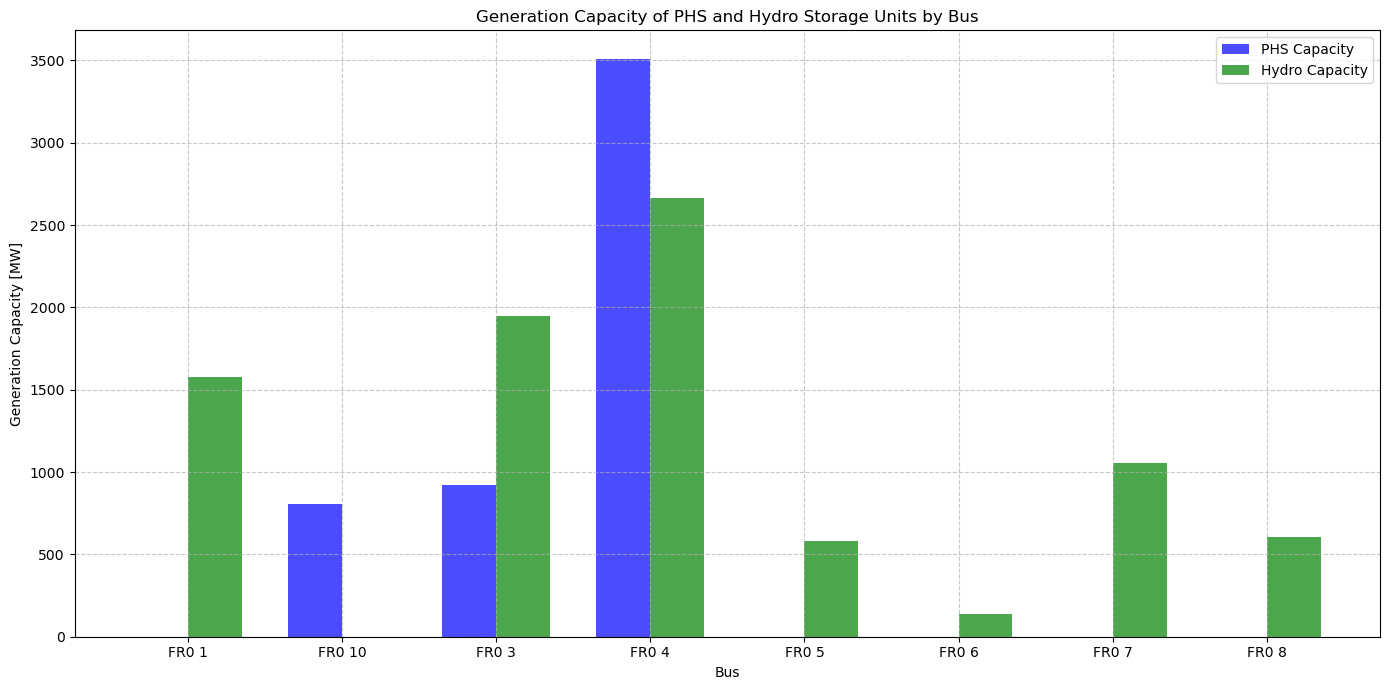

In [25]:
# Set the width of the bars
bar_width = 0.35

# Create an array for the x-axis (bus indices)
buses = sorted(set(phs_capacity_per_bus.index) | set(hydro_capacity_per_bus.index))
x_indices = range(len(buses))

# Create the bar diagram
plt.figure(figsize=(14, 7))

# Plot PHS generation capacity
phs_bars = plt.bar(
    x_indices,
    [phs_capacity_per_bus.get(bus, 0) for bus in buses],
    width=bar_width,
    label="PHS Capacity",
    color="blue",
    alpha=0.7
)

# Plot Hydro generation capacity
hydro_bars = plt.bar(
    [i + bar_width for i in x_indices],
    [hydro_capacity_per_bus.get(bus, 0) for bus in buses],
    width=bar_width,
    label="Hydro Capacity",
    color="green",
    alpha=0.7
)

# Add labels and title
plt.title("Generation Capacity of PHS and Hydro Storage Units by Bus")
plt.xlabel("Bus")
plt.ylabel("Generation Capacity [MW]")
plt.xticks([i + bar_width / 2 for i in x_indices], buses)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


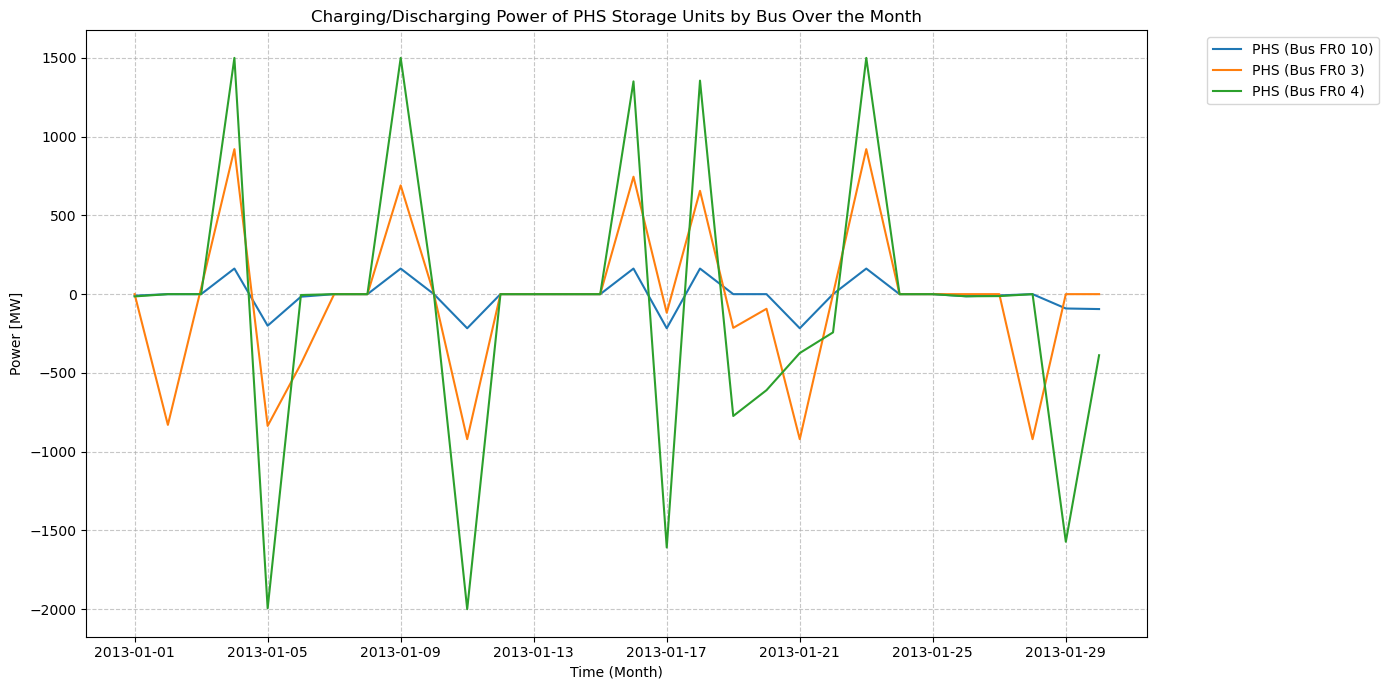

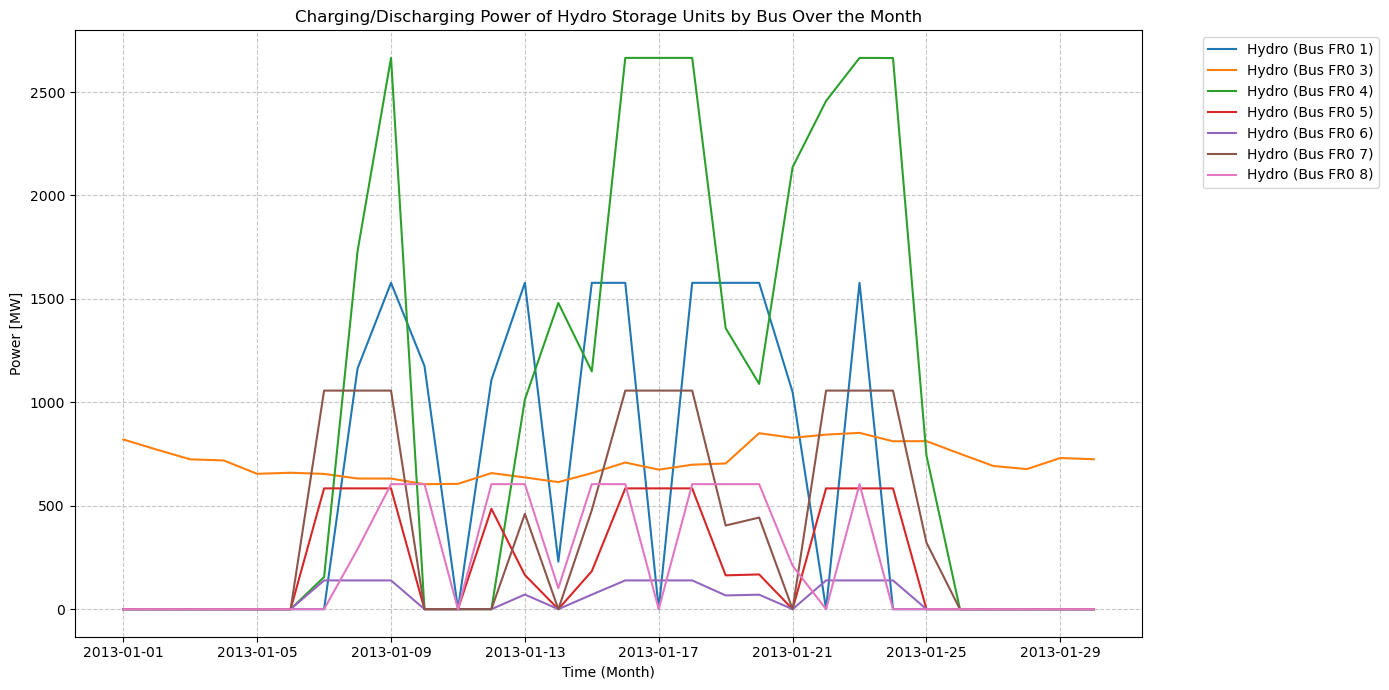

In [26]:
# time series for storage power
phs_storage_p = n.storage_units_t.p[phs_storage.index]
hydro_storage_p = n.storage_units_t.p[hydro_storage.index]

# Aggregate charging/discharging power (P) of PHS storage units by bus
phs_storage_p_per_bus = pd.DataFrame()
for bus in phs_storage.bus.unique():
    units_at_bus = phs_storage[phs_storage.bus == bus].index
    phs_storage_p_per_bus[bus] = phs_storage_p[units_at_bus].sum(axis=1)

# Aggregate charging/discharging power (P) of hydro storage units by bus
hydro_storage_p_per_bus = pd.DataFrame()
for bus in hydro_storage.bus.unique():
    units_at_bus = hydro_storage[hydro_storage.bus == bus].index
    hydro_storage_p_per_bus[bus] = hydro_storage_p[units_at_bus].sum(axis=1)

plt.figure(figsize=(14, 7))

# Plot PHS storage units by bus
for bus in phs_storage_p_per_bus.columns:
    plt.plot(
        phs_storage_p_per_bus.index,
        phs_storage_p_per_bus[bus],
        label=f"PHS (Bus {bus})",
        linestyle="-",
        linewidth=1.5
    )

# Diagram description in English
plt.title("Charging/Discharging Power of PHS Storage Units by Bus Over the Month")
plt.xlabel("Time (Month)")
plt.ylabel("Power [MW]")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

# Plot Hydro storage units by bus
for bus in hydro_storage_p_per_bus.columns:
    plt.plot(
        hydro_storage_p_per_bus.index,
        hydro_storage_p_per_bus[bus],
        label=f"Hydro (Bus {bus})",
        linestyle="-",
        linewidth=1.5
    )

# Diagram description in English
plt.title("Charging/Discharging Power of Hydro Storage Units by Bus Over the Month")
plt.xlabel("Time (Month)")
plt.ylabel("Power [MW]")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
